In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

**Load data**

In [3]:
df_train = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Training.csv")
df_test = pd.read_csv("/kaggle/input/disease-prediction-using-machine-learning/Testing.csv")

**Exploratory Data**

In [4]:
df_train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  

[5 rows x 134 columns]

In [5]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [6]:
df_train.info(max_cols=134)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

In [7]:
df_test.info(max_cols=133)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         42 non-null     int64 
 1    skin_rash                       42 non-null     int64 
 2    nodal_skin_eruptions            42 non-null     int64 
 3    continuous_sneezing             42 non-null     int64 
 4    shivering                       42 non-null     int64 
 5    chills                          42 non-null     int64 
 6    joint_pain                      42 non-null     int64 
 7    stomach_pain                    42 non-null     int64 
 8    acidity                         42 non-null     int64 
 9    ulcers_on_tongue                42 non-null     int64 
 10   muscle_wasting                  42 non-null     int64 
 11   vomiting                        42 non-null     int64 
 12   burning_micturition             42 n

In [8]:
df_train.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [9]:
df_test.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples  blackheads   scurring  \
count         42.000000  ...           42.000000   42.000000  42.000000   
mean           0.023810  ...            0.023810    0.023810   0.023810   
std            0.154303  ...            0.154303    0.154303   0.154303   
min            0.000000  ...            0.000000    0.000000   0.000000   
25%            0.000000  ...            0.000000    0.000000   0.000000   
50%            0.000000  ...            0.000000    0.000000   0.000000   
75%            0.000000  ...            0.000000    0.000000   0.000000   
max            1.000000  ...            1.000000    1.000000   1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count     42.000000            42.000000             42.000000   
mean       0.047619             0.023810              0.023810   
std        0.215540             0.154303              0.154303   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails    blister  red_sore_around_nose  yellow_crust_ooze  
count           42.000000  42.000000             42.000000          42.000000  
mean             0.023810   0.023810              0.047619           0.023810  
std              0.154303   0.154303              0.215540           0.154303  
min              0.000000   0.000000              0.000000           0.000000  
25%              0.000000   0.000000              0.000000           0.000000  
50%              0.000000   0.000000              0.000000           0.000000  
75%              0.000000   0.000000              0.000000           0.000000  
max              1.000000   1.000000              1.000000           1.000000  

[8 rows x 132 columns]

In [10]:
df_train = df_train.drop("Unnamed: 133", axis=1)  

In [11]:
df_train.head(2)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  

[2 rows x 133 columns]

In [12]:
df_test.head(2)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0           Allergy  

[2 rows x 133 columns]

In [13]:
for col in df_train:
    print(f"{col} has {df_train[col].unique()}")

itching has [1 0]
skin_rash has [1 0]
nodal_skin_eruptions has [1 0]
continuous_sneezing has [0 1]
shivering has [0 1]
chills has [0 1]
joint_pain has [0 1]
stomach_pain has [0 1]
acidity has [0 1]
ulcers_on_tongue has [0 1]
muscle_wasting has [0 1]
vomiting has [0 1]
burning_micturition has [0 1]
spotting_ urination has [0 1]
fatigue has [0 1]
weight_gain has [0 1]
anxiety has [0 1]
cold_hands_and_feets has [0 1]
mood_swings has [0 1]
weight_loss has [0 1]
restlessness has [0 1]
lethargy has [0 1]
patches_in_throat has [0 1]
irregular_sugar_level has [0 1]
cough has [0 1]
high_fever has [0 1]
sunken_eyes has [0 1]
breathlessness has [0 1]
sweating has [0 1]
dehydration has [0 1]
indigestion has [0 1]
headache has [0 1]
yellowish_skin has [0 1]
dark_urine has [0 1]
nausea has [0 1]
loss_of_appetite has [0 1]
pain_behind_the_eyes has [0 1]
back_pain has [0 1]
constipation has [0 1]
abdominal_pain has [0 1]
diarrhoea has [0 1]
mild_fever has [0 1]
yellow_urine has [0 1]
yellowing_of_eyes

In [14]:
  df_train['prognosis'].nunique()

41

In [15]:
pd.DataFrame(df_train["prognosis"].value_counts()) #There are 41 diseases in a column prognosis

count
prognosis                                     
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy                                    120
hepatitis A                                120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
Impetigo                                   120

In [16]:
df_train[df_train.prognosis == "Pneumonia"] #View only people with pneumonia from the column prognosis

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
270         0          0                     0                    0   
271         0          0                     0                    0   
272         0          0                     0                    0   
273         0          0                     0                    0   
274         0          0                     0                    0   
...       ...        ...                   ...                  ...   
4742        0          0                     0                    0   
4783        0          0                     0                    0   
4824        0          0                     0                    0   
4865        0          0                     0                    0   
4906        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
270           0       1           0             0        0                 0   
271           0       1           0             0        0                 0   
272           0       1           0             0        0                 0   
273           0       0           0             0        0                 0   
274           0       1           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4742          0       1           0             0        0                 0   
4783          0       1           0             0        0                 0   
4824          0       1           0             0        0                 0   
4865          0       1           0             0        0                 0   
4906          0       1           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
270   ...           0         0             0                    0   
271   ...           0         0             0                    0   
272   ...           0         0             0                    0   
273   ...           0         0             0                    0   
274   ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4742  ...           0         0             0                    0   
4783  ...           0         0             0                    0   
4824  ...           0         0             0                    0   
4865  ...           0         0             0                    0   
4906  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
270                      0                   0        0                     0   
271                      0                   0        0                     0   
272                      0                   0        0                     0   
273                      0                   0        0                     0   
274                      0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4742                     0                   0        0                     0   
4783                     0                   0        0                     0   
4824                     0                   0        0                     0   
4865                     0                   0        0                     0   
4906                     0                   0        0                     0   

      yellow_crust_ooze  prognosis  
270                   0  Pneumonia  
271                   0  Pneumonia  
272                   0  Pneumonia  
273                   0  Pneumonia  
274                   0  Pneumonia  
...                 ...        ...  
4742                  0  Pneumonia  
4783                  0  Pneumonia  
4824                  0  Pneumonia  
4865    

In [17]:
df_train[df_train.prognosis == "Allergy"] #View only allergy from the column prognosis

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
10          0          0                     0                    1   
11          0          0                     0                    0   
12          0          0                     0                    1   
13          0          0                     0                    1   
14          0          0                     0                    1   
...       ...        ...                   ...                  ...   
4716        0          0                     0                    1   
4757        0          0                     0                    1   
4798        0          0                     0                    1   
4839        0          0                     0                    1   
4880        0          0                     0                    1   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
10            1       1           0             0        0                 0   
11            1       1           0             0        0                 0   
12            0       1           0             0        0                 0   
13            1       0           0             0        0                 0   
14            1       1           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4716          1       1           0             0        0                 0   
4757          1       1           0             0        0                 0   
4798          1       1           0             0        0                 0   
4839          1       1           0             0        0                 0   
4880          1       1           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
10    ...           0         0             0                    0   
11    ...           0         0             0                    0   
12    ...           0         0             0                    0   
13    ...           0         0             0                    0   
14    ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4716  ...           0         0             0                    0   
4757  ...           0         0             0                    0   
4798  ...           0         0             0                    0   
4839  ...           0         0             0                    0   
4880  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
10                       0                   0        0                     0   
11                       0                   0        0                     0   
12                       0                   0        0                     0   
13                       0                   0        0                     0   
14                       0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4716                     0                   0        0                     0   
4757                     0                   0        0                     0   
4798                     0                   0        0                     0   
4839                     0                   0        0                     0   
4880                     0                   0        0                     0   

      yellow_crust_ooze  prognosis  
10                    0    Allergy  
11                    0    Allergy  
12                    0    Allergy  
13                    0    Allergy  
14                    0    Allergy  
...                 ...        ...  
4716                  0    Allergy  
4757                  0    Allergy  
4798                  0    Allergy  
4839    

**Visulaization**

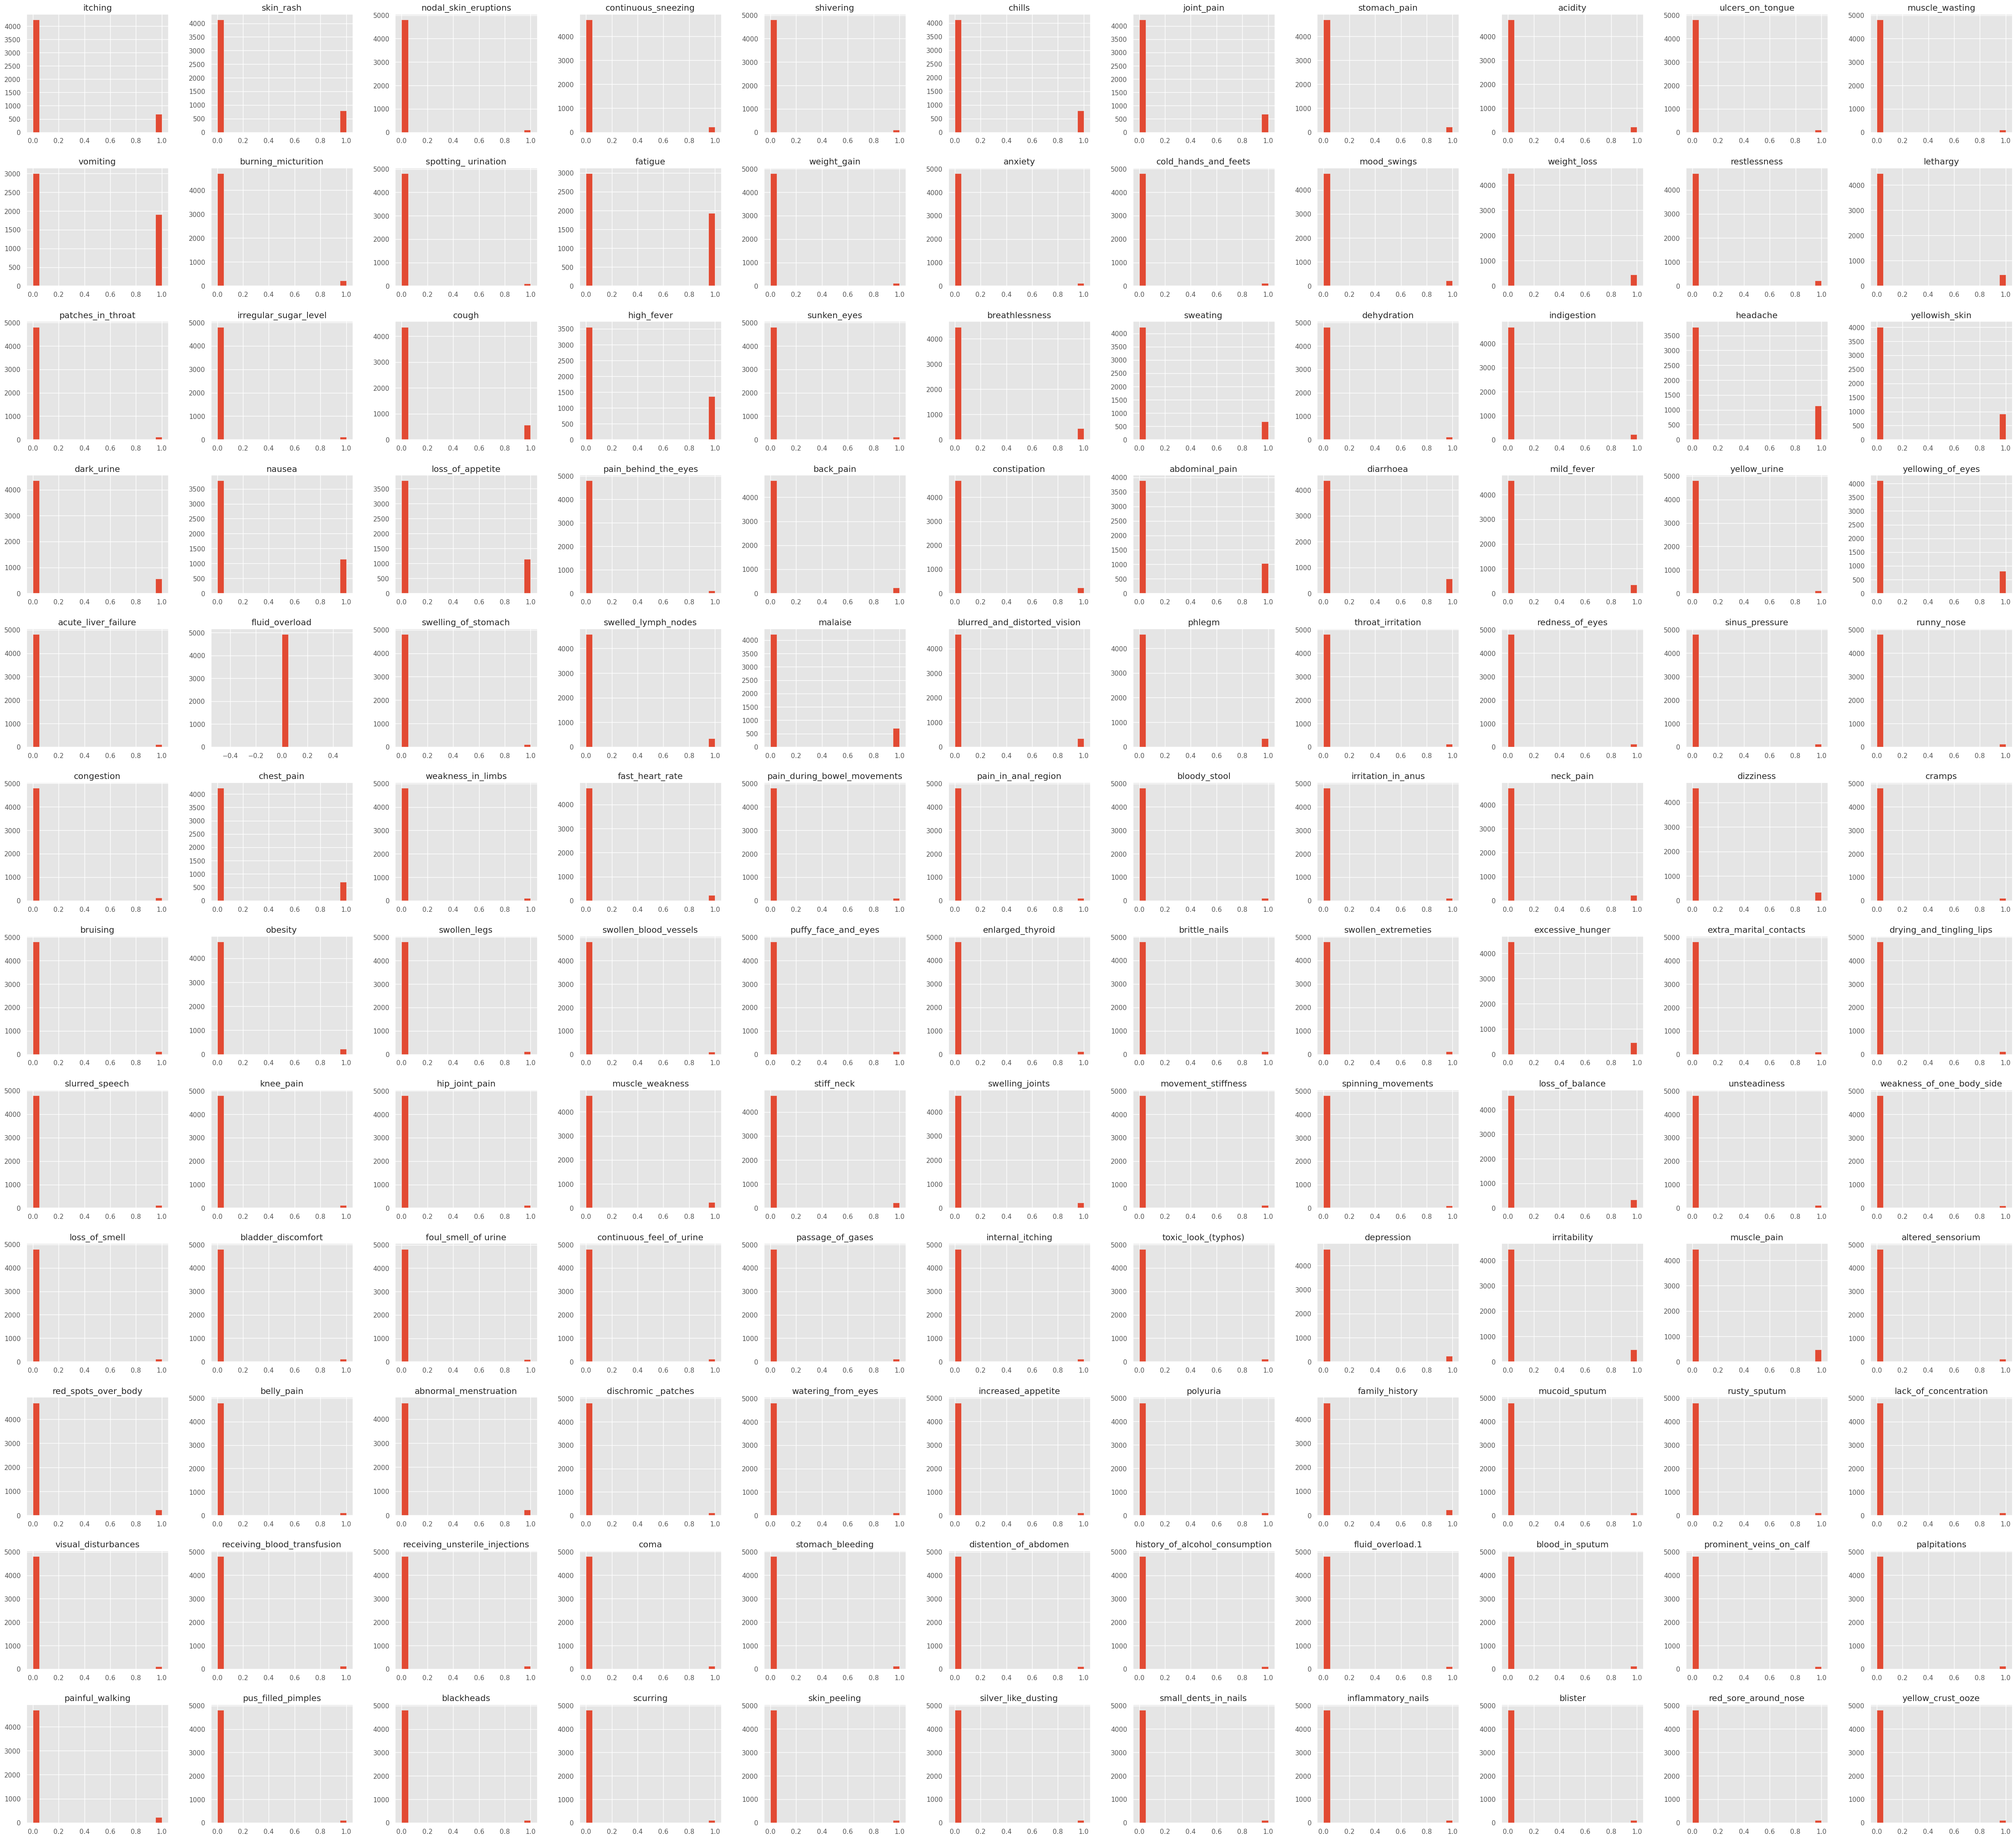

In [18]:
plt.style.use("ggplot")
df_train.hist(figsize =(60,55),bins=20)
plt.show()

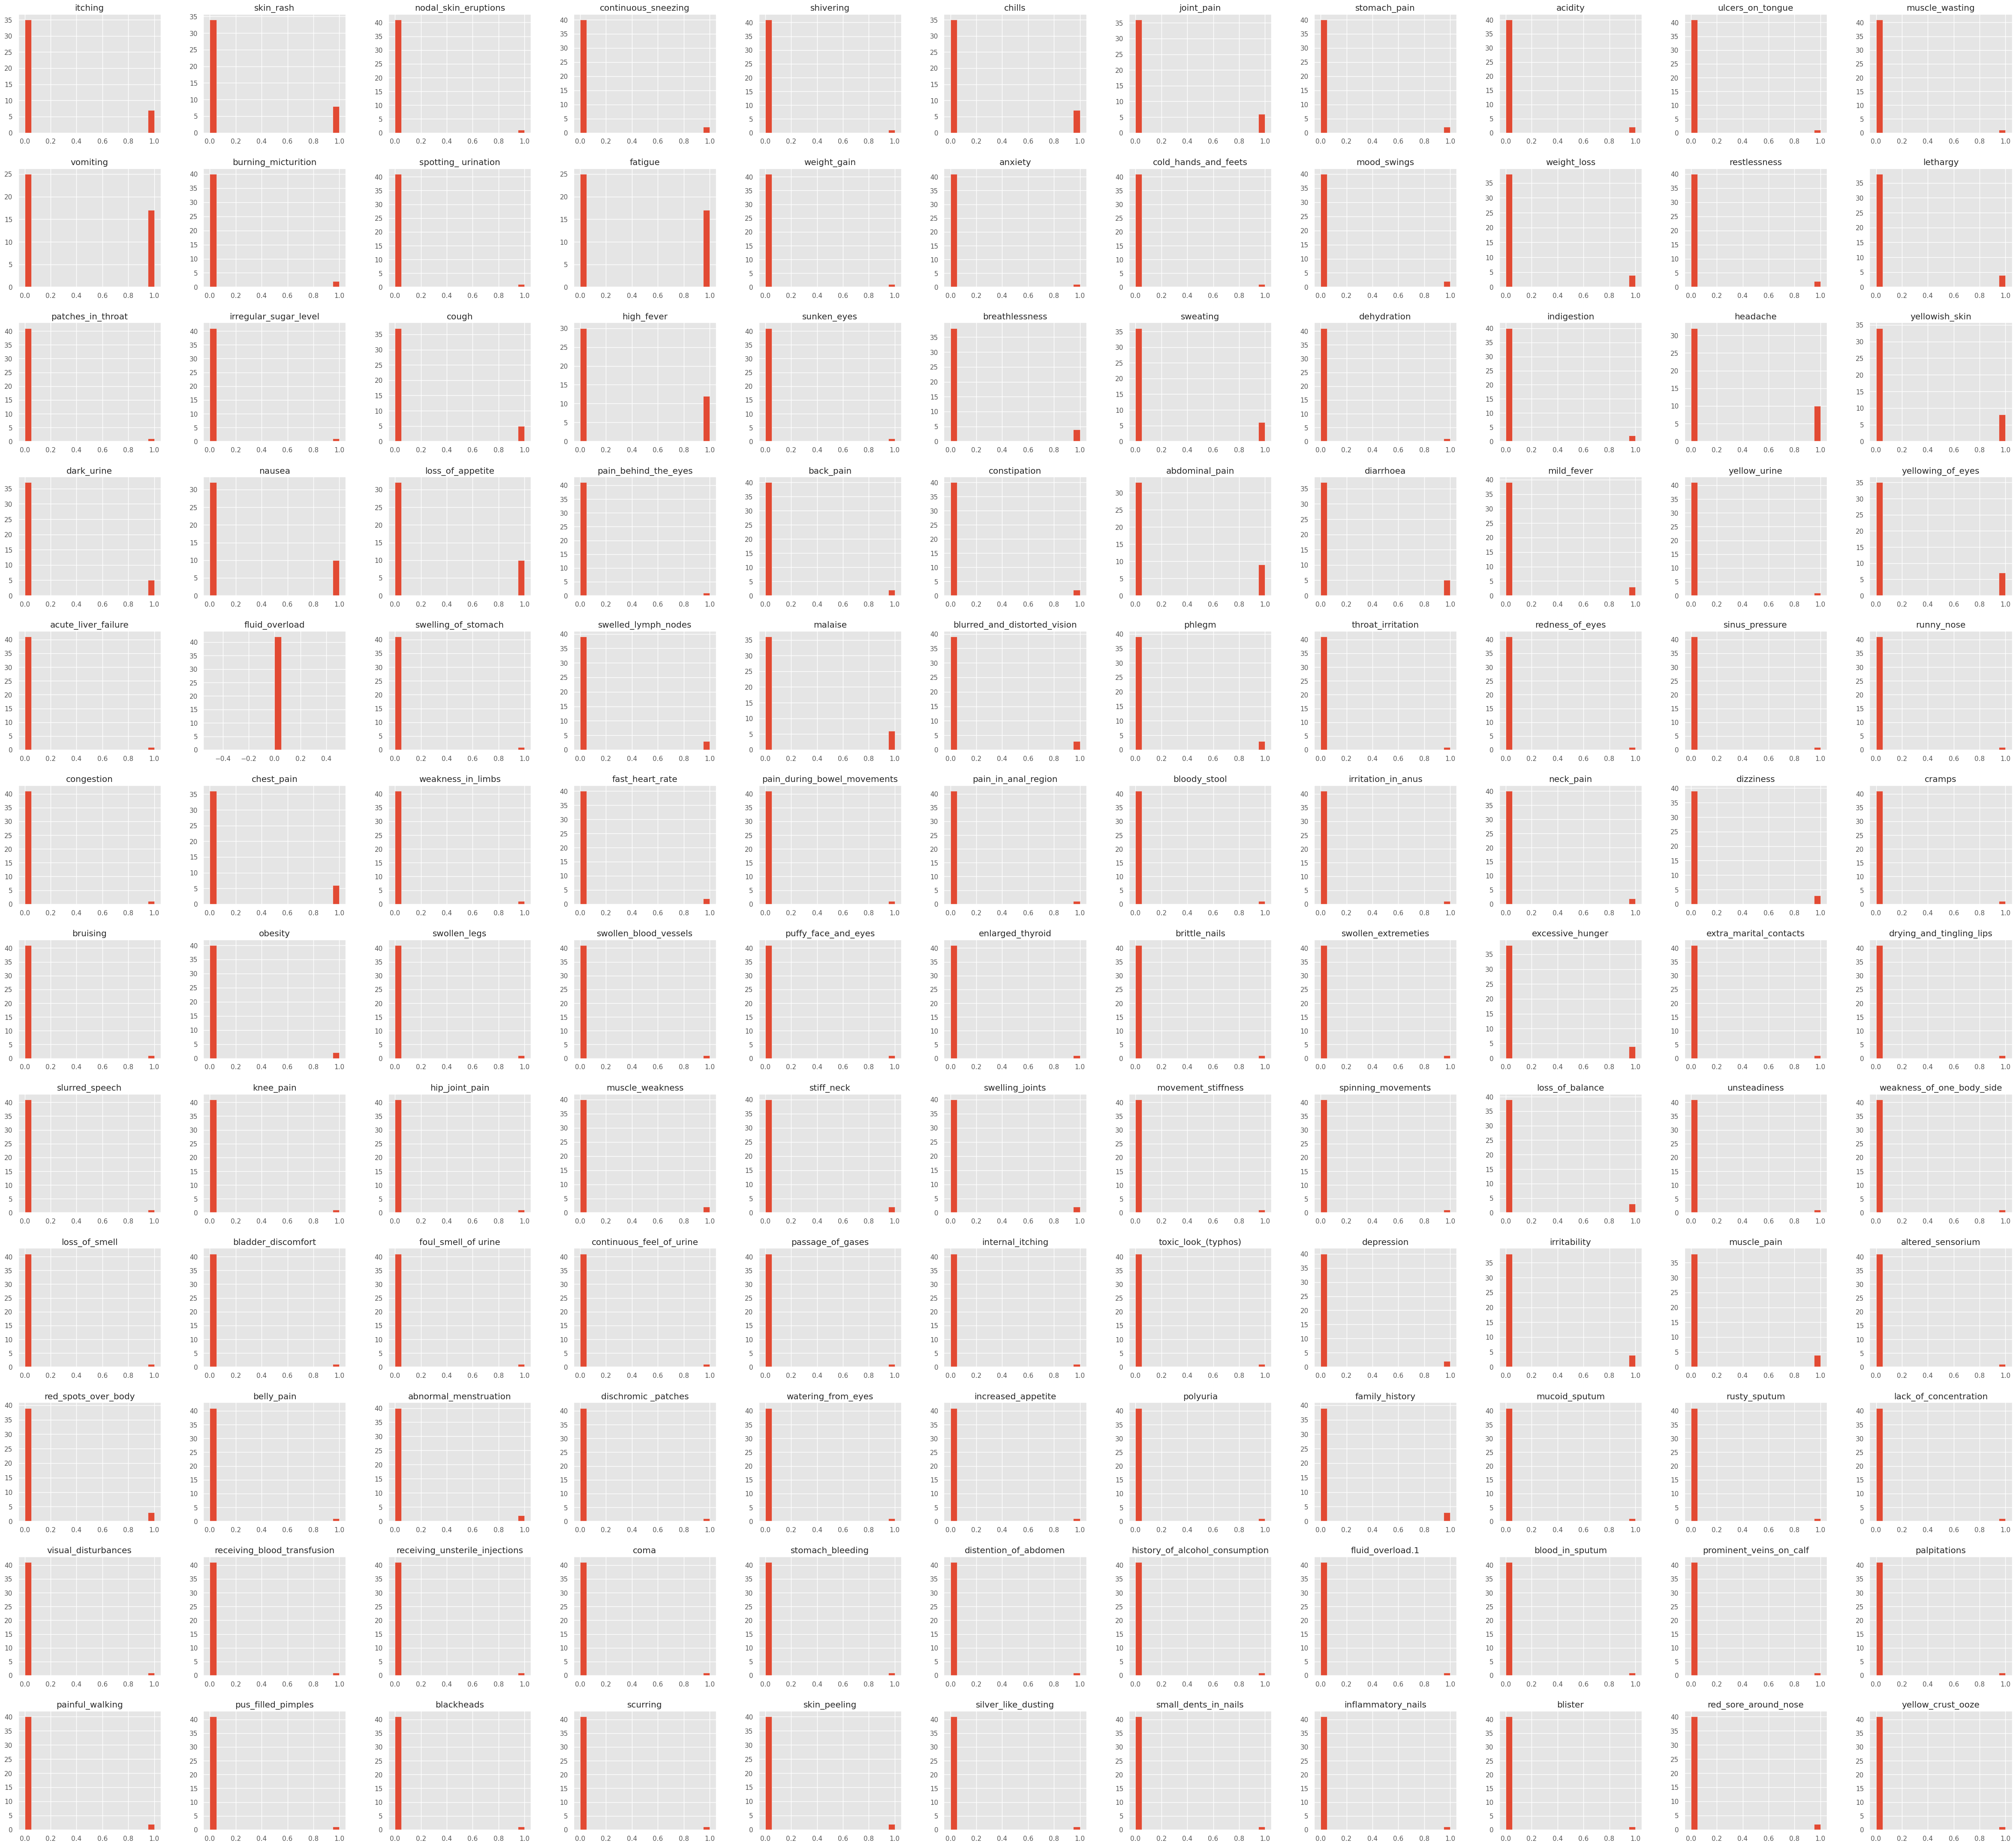

In [19]:
plt.style.use("ggplot")
df_test.hist(figsize =(60,55),bins=20)
plt.show()

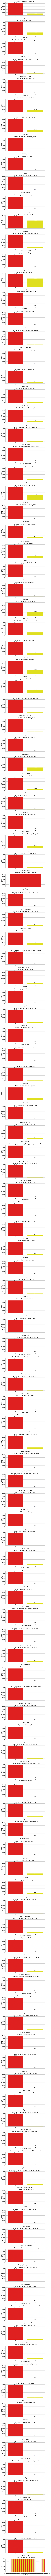

In [20]:
# Assuming dftrain is your DataFrame
columns = list(df_train.columns)

# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'yellow']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 3 * len(columns)))

# Iterate through each column
for i, column in enumerate(columns):
    # Plot the count for each symptom
    sns.countplot(x=column, data=df_train, palette=colors, ax=axs[i])
    
    # Add labels and title
    axs[i].set_title("Count of Symptom \"" + column + "\"", fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)
    
    # Add percentage labels on top of bars
    total = len(df_train[column])
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height/total:.1%}', ha="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

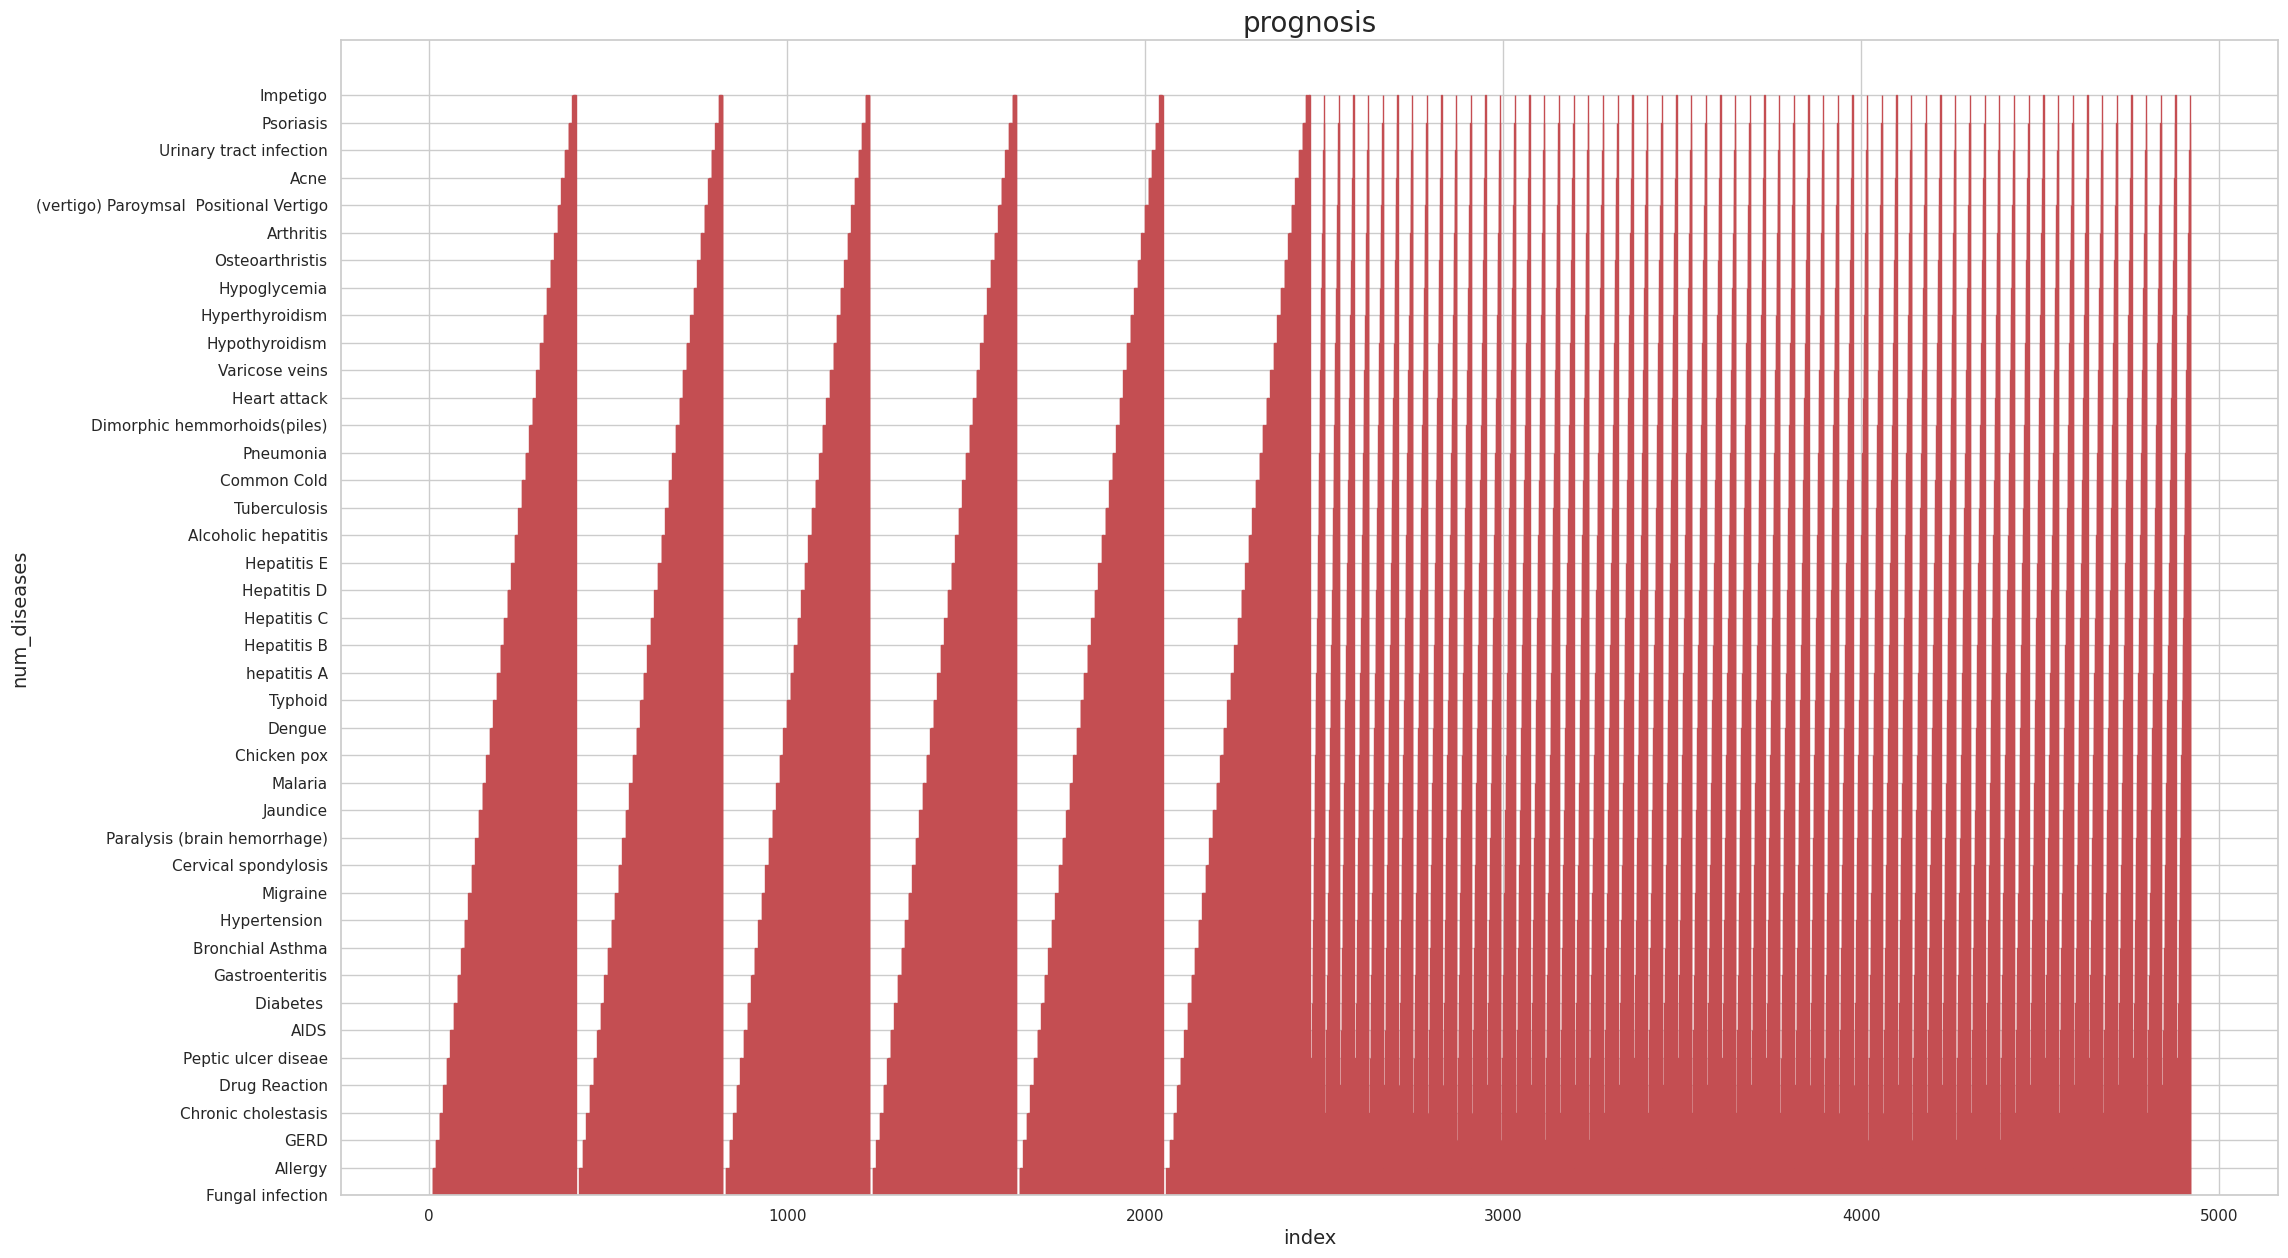

In [21]:
plt.figure(figsize=(25,15))  
plt.bar(df_train.index, df_train.prognosis, ec='r')

plt.title('prognosis', fontsize=20)
plt.xlabel('index', fontsize=14)
plt.ylabel('num_diseases', fontsize=14)
plt.show()

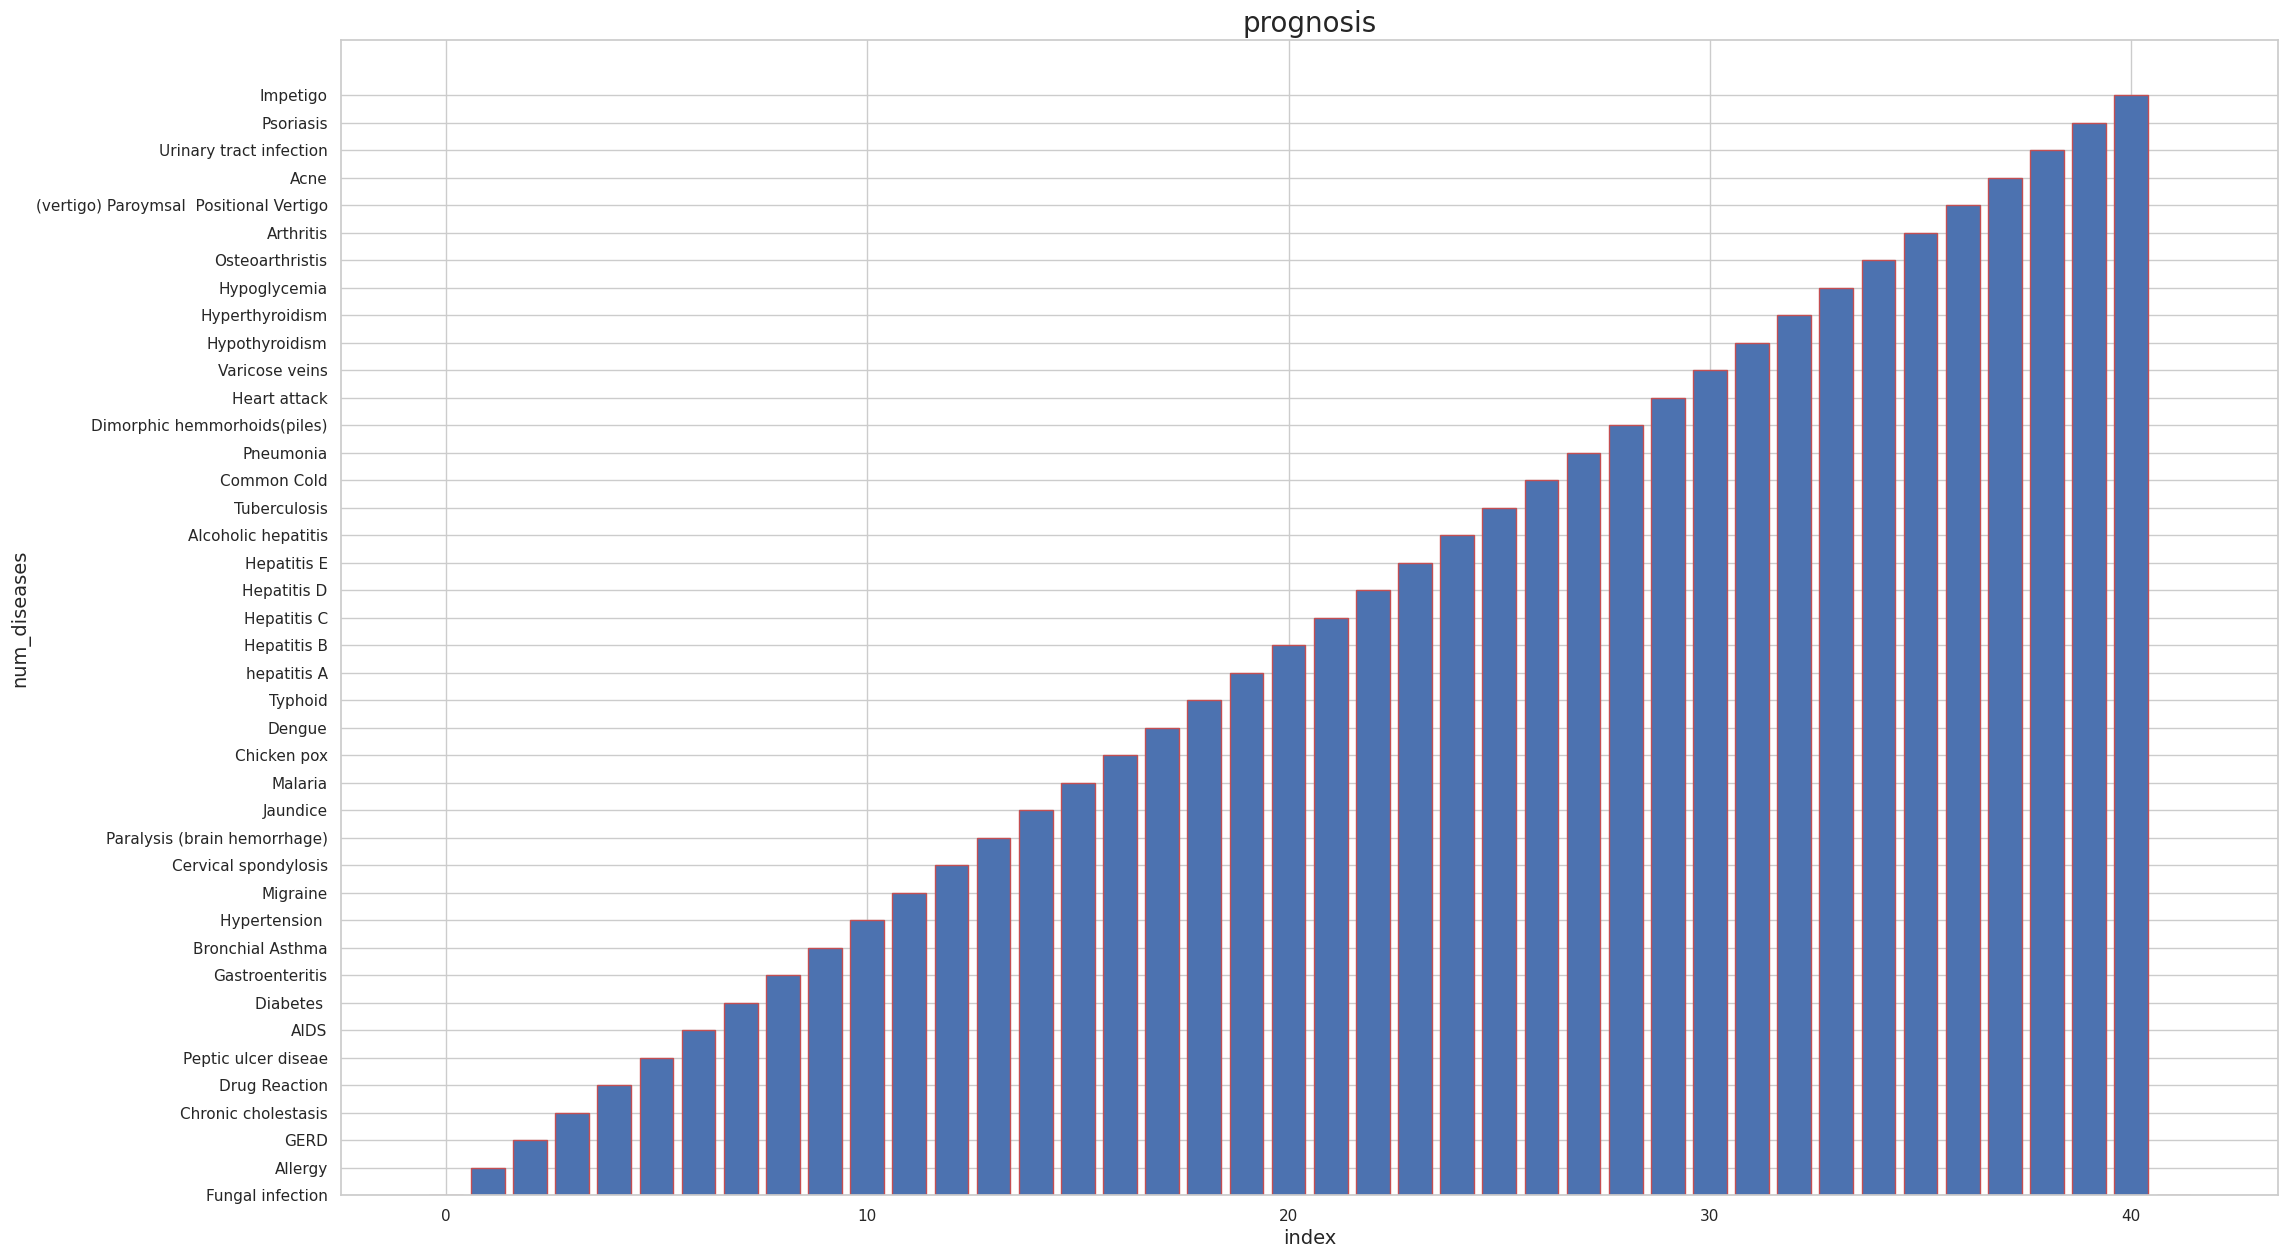

In [22]:
plt.figure(figsize=(25,15))  
plt.bar(df_test.index, df_test.prognosis, ec='r')

plt.title('prognosis', fontsize=20)
plt.xlabel('index', fontsize=14)
plt.ylabel('num_diseases', fontsize=14)
plt.show()

**Label Encoder to convert category to numarical**

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train["prognosis"] = le.fit_transform(df_train['prognosis'])
df_test["prognosis"] = le.fit_transform(df_test['prognosis'])

**Split data to train and test**

In [24]:
# Features and labels for training
X_train = df_train.iloc[:, :-1]  # All columns except the last one (symptoms)
y_train = df_train.iloc[:, -1]   # The last column (prognosis)

# Features and labels for testing
X_test = df_test.iloc[:, :-1]    # All columns except the last one (symptoms)
y_test = df_test.iloc[:, -1]     # The last column (prognosis)

In [25]:
df_train.head(2)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0         15  
1                  0         15  

[2 rows x 133 columns]

**Correlation between feature and target**

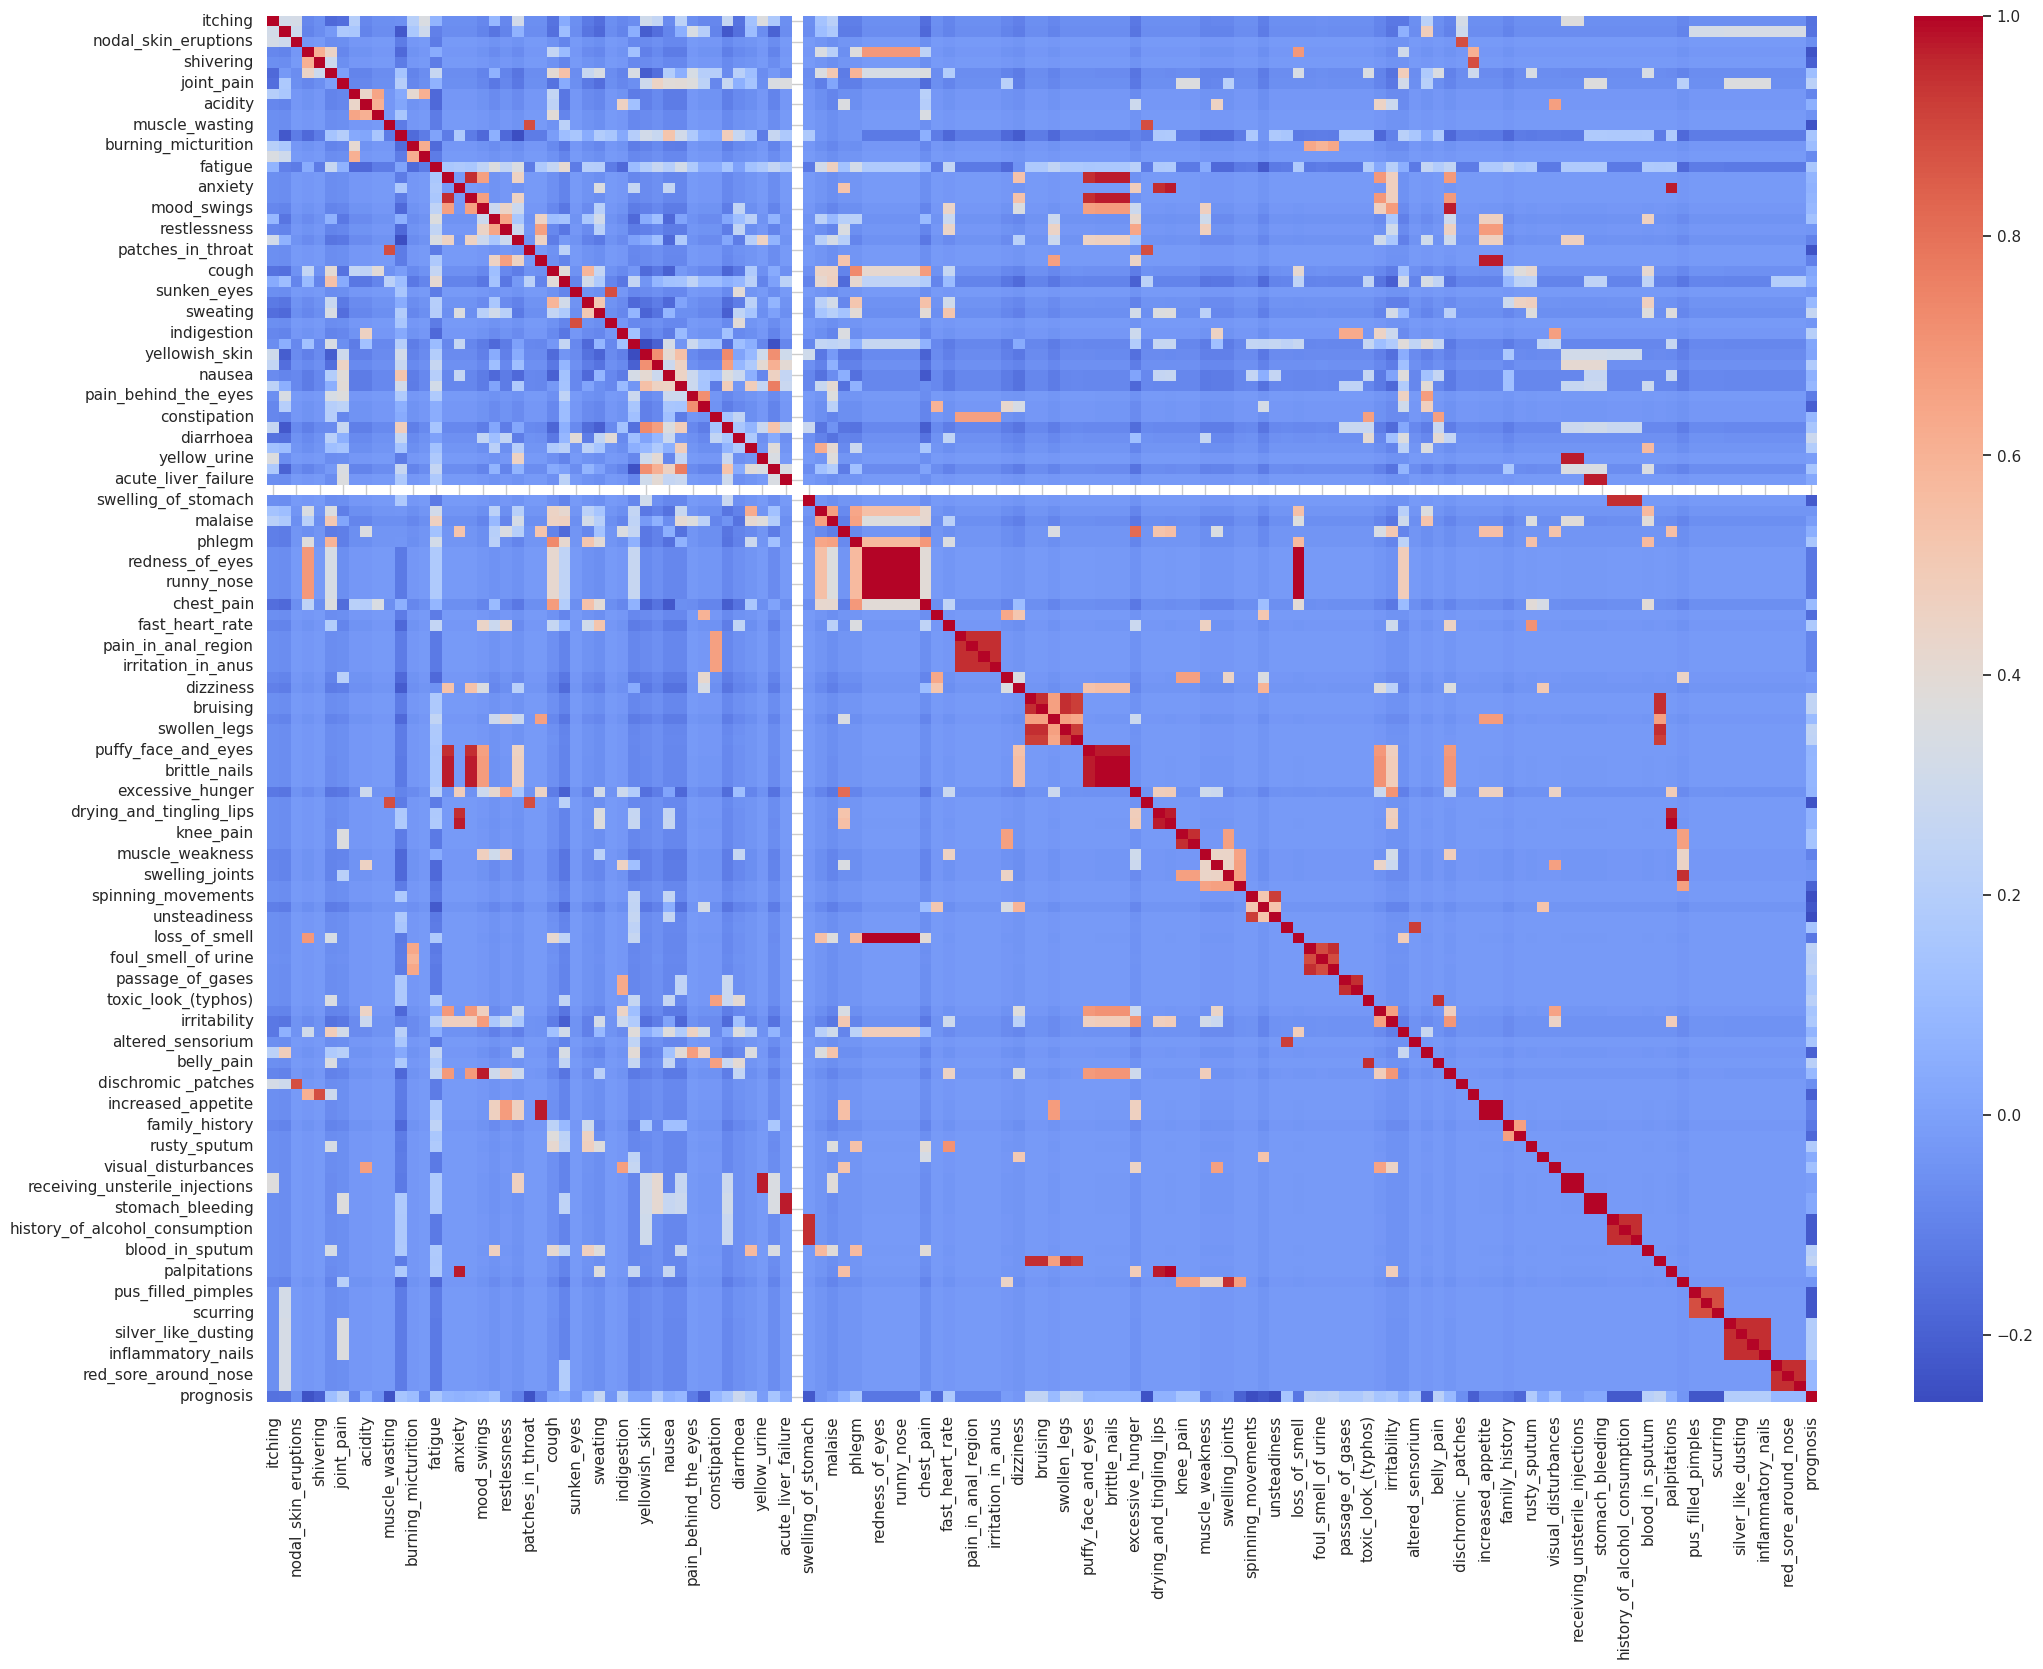

In [26]:
plt.figure(figsize=(25, 18))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=False)
plt.show()

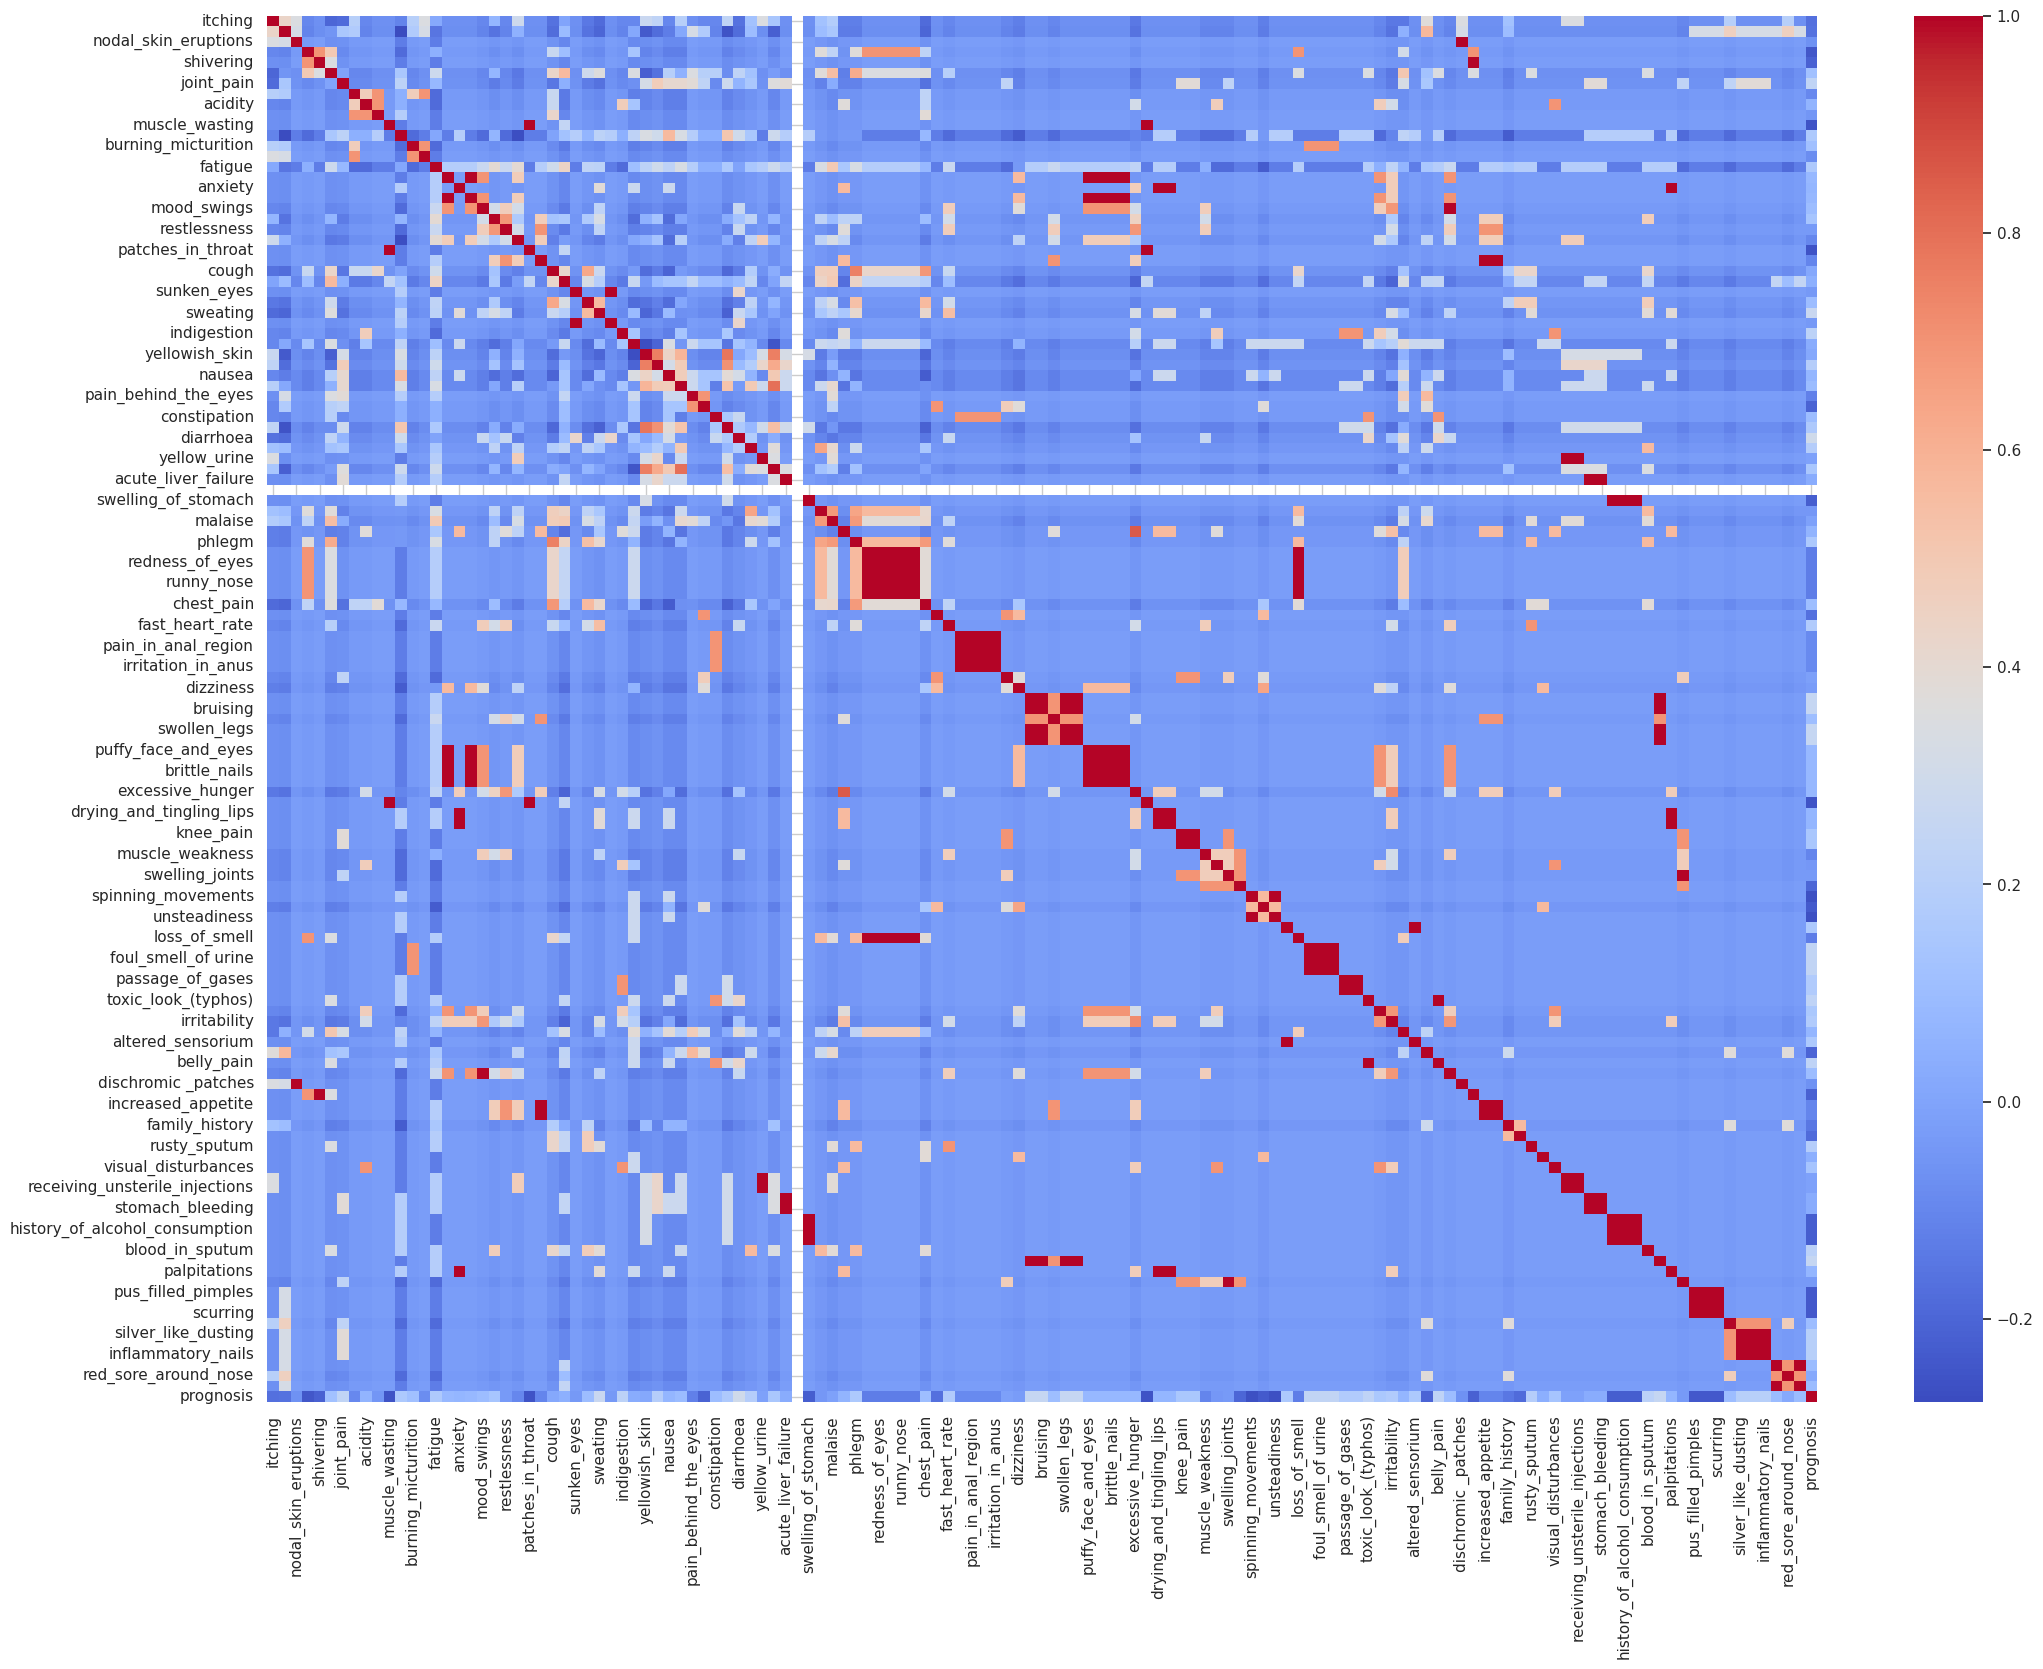

In [27]:
plt.figure(figsize=(25, 18))
sns.heatmap(df_test.corr(), cmap='coolwarm', annot=False)
plt.show()

**Linear Regression Model**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
linregressor = LinearRegression()
linregressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = linregressor.predict(X_test)

In [30]:
print(linregressor.score(X_test , y_test)*100)
print(linregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

99.28113221930069
97.81345350964776
mean_squared_error= 0.9866297281530989


**Decision Tree Regressor Model**

In [31]:
from sklearn.tree import DecisionTreeRegressor
dectreeregressor = DecisionTreeRegressor(max_depth=10,random_state=42,min_samples_split=2)
dectreeregressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [32]:
y_pred = dectreeregressor.predict(X_test)

In [33]:
print("score_test=", dectreeregressor.score(X_test , y_test)*100)
print("score_train=", dectreeregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 86.59711237728
score_train= 80.87793429787003
mean_squared_error= 18.395159341828947


**Random Forest Regressor Model**

In [34]:
from sklearn.ensemble import RandomForestRegressor
randforestregressor = RandomForestRegressor(n_estimators=200,max_depth=10,random_state=42 ,min_samples_split=2)
randforestregressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [35]:
y_pred = randforestregressor.predict(X_test)

In [36]:
print("score_test=", randforestregressor.score(X_test , y_test)*100)
print("score_train=", randforestregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 87.27555053013985
score_train= 82.3108520304833
mean_squared_error= 17.464018361113894


**SVM Regression Model**

In [37]:
from sklearn.svm import SVR
svregressor = SVR(kernel='linear', C=2.0, epsilon=0.2)
svregressor.fit(X_train, y_train)

SVR(C=2.0, epsilon=0.2, kernel='linear')

In [38]:
y_pred = svregressor.predict(X_test)

In [39]:
print("score_test=", svregressor.score(X_test , y_test)*100)
print("score_train=", svregressor.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 99.91140658984237
score_train= 97.05305310395127
mean_squared_error= 0.12159244652046611


**Voting Regression Model**

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model

In [41]:
GBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.5, n_estimators=200, max_depth=10)
KNN = KNeighborsRegressor(n_neighbors=6)
RidgeRegressionModel = linear_model.Ridge(alpha=1, random_state= 67)

In [42]:
VotingRegressorModel = VotingRegressor([('GBR', GBR), ('KNN', KNN), ('RRM',RidgeRegressionModel)])
VotingRegressorModel.fit(X_train, y_train)


VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(learning_rate=0.5,
                                                       max_depth=10,
                                                       n_estimators=200)),
                            ('KNN', KNeighborsRegressor(n_neighbors=6)),
                            ('RRM', Ridge(alpha=1, random_state=67))])

In [43]:
y_pred = VotingRegressorModel.predict(X_test)

In [44]:
print("score_test=", VotingRegressorModel.score(X_test , y_test)*100)
print("score_train=", VotingRegressorModel.score(X_train , y_train)*100)
print("mean_squared_error=", metrics.mean_squared_error(y_test, y_pred))

score_test= 99.91305482575471
score_train= 99.75440275197454
mean_squared_error= 0.11933028010575443


**This model has achieved the highest accuracy.**

**Thank You**